<a href="https://colab.research.google.com/github/yk-Jeong/Kaggle-Studies/blob/main/8th_keras_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=utP3gh9DZI8

# 케라스 보스턴 주택 가격 모델

### modules import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data #keras dataset으로 존재
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model 

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수: 3~9 사이의 값(min=3, max=9, *범죄율과 스케일이 다름*)

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [2]:
tf.random.set_seed(111)
(X_train_full, y_train_full), (X_test, y_test) = load_data(path = 'boston_housing.npz', 
                                                           test_split = 0.2, seed = 111)


### 데이터 확인

In [3]:
print("학습 데이터: {}\t레이블: {}".format(X_train_full.shape, y_train_full.shape))
print("테스트 데이터: {}\t레이블: {}".format(X_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


*(훈련데이터의 데이터/정답 레이블 첫 항목을 출력해본다)*

In [4]:
print(X_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [5]:
print(y_train_full[0]) #$1000 단위이므로 *1000 = $25,000

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [6]:
mean = np.mean(X_train_full, axis=0)
std = np.std(X_train_full, axis=0)

X_train_preprocessed = (X_train_full - mean) / std
X_test = (X_test - mean) / mean

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_preprocessed, y_train_full,
                                                  test_size = 0.3,
                                                  random_state = 111)

In [8]:
print("학습 데이터: {}\t레이블: {}".format(X_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(X_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(X_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(X_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


*feature가 13개인 것을 확인 가능*

### 모델 구성
- 학습 데이터가 매우 적은 경우, 모델의 깊이를 깊게 할수록 과대적합(Overfitting)이 일어날 확률이 높음

*따라서 학습 데이터가 적은 경우에는 모델의 깊이가 지나치게 깊지 않도록 쌓아줄 필요가 있음*

In [9]:
model = Sequential([Dense(100, activation = 'relu', input_shape=(13, ), name='dense1'),
                    Dense(64, activation = 'relu', name = 'dense2'),
                    Dense(32, activation = 'relu', name = 'dense3'),
                    Dense(1, name = 'output')]) #결과값은 단일하게 나오므로(주택가격은 회귀모형임) output을 1로 설정

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               1400      
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


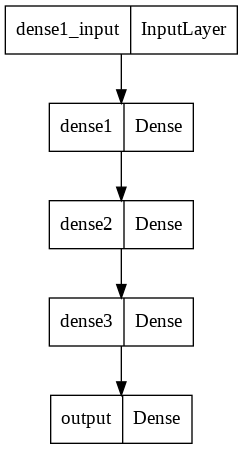

In [11]:
plot_model(model) #img로 확인할 수 있음

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [12]:
model.compile(loss = 'mse', #loss 손실함수는 mse
              optimizer = Adam(learning_rate = 1e-2),  #학습률을 왜 작은 값으로 두었을까 
              metrics = ['mae']) #metrics 평가지표는 mae인 것 유의

### 모델 학습

In [13]:
history = model.fit(X_train, y_train, epochs = 300,
                    validation_data = (X_val, y_val))

Epoch 1/300
9/9 [==============================] - 2s 51ms/step - loss: 285.1888 - mae: 14.0729 - val_loss: 132.4612 - val_mae: 9.1090
Epoch 2/300
9/9 [==============================] - 0s 18ms/step - loss: 60.9891 - mae: 5.9218 - val_loss: 31.4368 - val_mae: 4.4589
Epoch 3/300
9/9 [==============================] - 0s 11ms/step - loss: 33.7114 - mae: 4.2293 - val_loss: 22.2753 - val_mae: 3.6017
Epoch 4/300
9/9 [==============================] - 0s 11ms/step - loss: 21.5946 - mae: 3.4391 - val_loss: 13.9826 - val_mae: 2.9190
Epoch 5/300
9/9 [==============================] - 0s 11ms/step - loss: 16.3538 - mae: 2.8935 - val_loss: 11.7222 - val_mae: 2.7147
Epoch 6/300
9/9 [==============================] - 0s 11ms/step - loss: 13.6432 - mae: 2.5889 - val_loss: 10.9746 - val_mae: 2.5883
Epoch 7/300
9/9 [==============================] - 0s 14ms/step - loss: 12.6475 - mae: 2.4426 - val_loss: 9.1843 - val_mae: 2.3985
Epoch 8/300
9/9 [==============================] - 0s 18ms/step - loss: 12

### 모델 평가 
- `evaluate()`

In [15]:
model.evaluate(X_test, y_test) #test data로 평가한 결과 

4/4 [==============================] - 0s 3ms/step - loss: 188.8930 - mae: 10.0901


[188.89297485351562, 10.090087890625]

In [16]:
print(history.history.keys()) #처음 보는데요 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = 

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성